In [46]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
from bandit import K_bandit, GreedyAlgorithm, run_experiment

plt.style.use("ggplot")

# Sample rewards

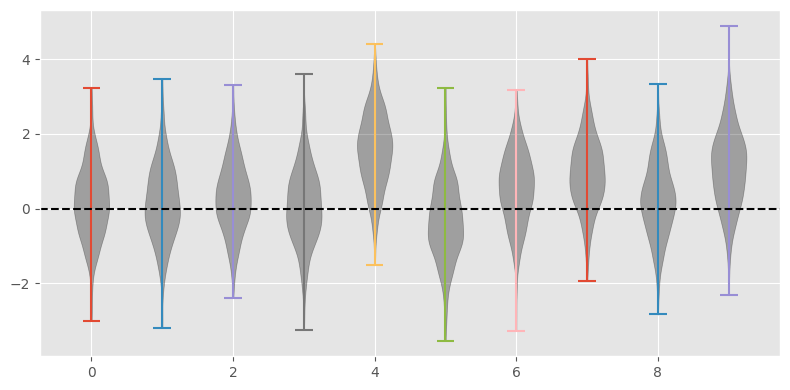

In [47]:
K = 10
T = 1000
N = 2000

bandit = K_bandit(K, 10)


fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for action, q in enumerate(bandit.q):
    samples = stats.norm(q, 1).rvs(1000)
    parts = ax.violinplot(samples, [action])
    for pc in parts["bodies"]:
        pc.set_facecolor("black")
        pc.set_edgecolor("black")
        # pc.set_alpha(0.6)

ax.axhline(0, color="black", alpha=1, linestyle="--")

fig.tight_layout()

# Epsilon value evaluation

In [48]:
N = 100
T = 1000
epsilons = [0, 0.1, 0.01]

rewards_scores = {epsilon: np.zeros((N, T)) for epsilon in epsilons}
correct_counts = {epsilon: np.zeros((N, T)) for epsilon in epsilons}

models = {epsilon: GreedyAlgorithm(K, epsilon, sample_averaging=True) for epsilon in epsilons}
REWARDS = bandit.simulate_game((N, T))

for epsilon in epsilons:
    model = models[epsilon]
    for n in range(N):
        model.init_model_params()
        for t in range(T):
            rewards = REWARDS[:, n, t]
            # agent turn
            action = model.act()
            model.step(action, rewards)
            # update simulation information
            if action == np.argmax(bandit.q):
                correct_counts[epsilon][n, t] += 1
            rewards_scores[epsilon][n, t] = rewards[action]

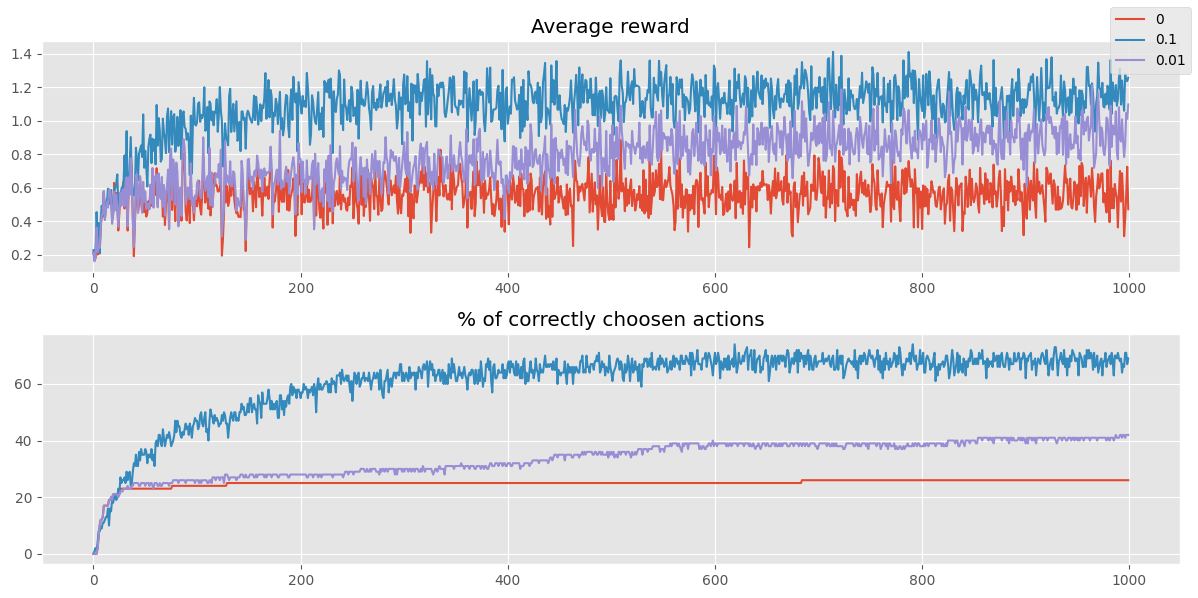

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

# Non-stationary distribution example

In [50]:
N = 100  # 100
T = 10_000  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "constant", "stationary": False}
all_model_params = {"epsilon": 0.1}
model_parameters = {
    "SA": {"sample_averaging": True},
    "IC_mean": {"sample_averaging": False, "stepsize": 0.0},
    "IC_fixed": {"sample_averaging": False, "stepsize": 0.1},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

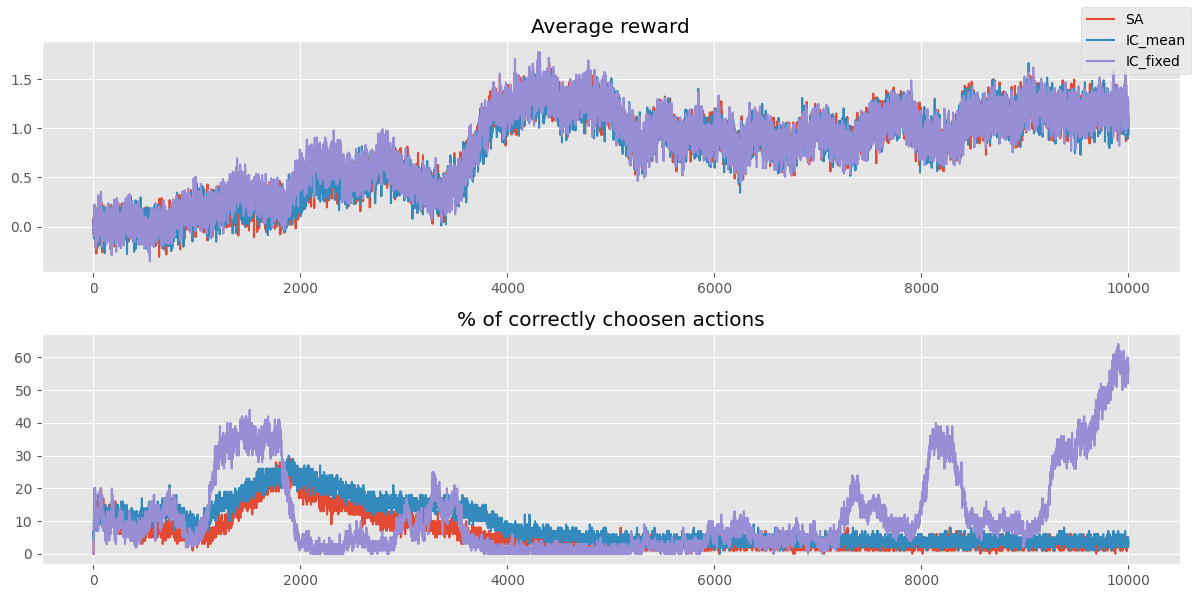

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

# Optimistic intial conditions

In [55]:
N = 100  # 100
T = 500  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "normal", "stationary": True}
all_model_params = {"epsilon": 0.1}
model_parameters = {
    "Realistic": {"sample_averaging": True},
    "Optimistic": {"sample_averaging": True, "Q_init": 5},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

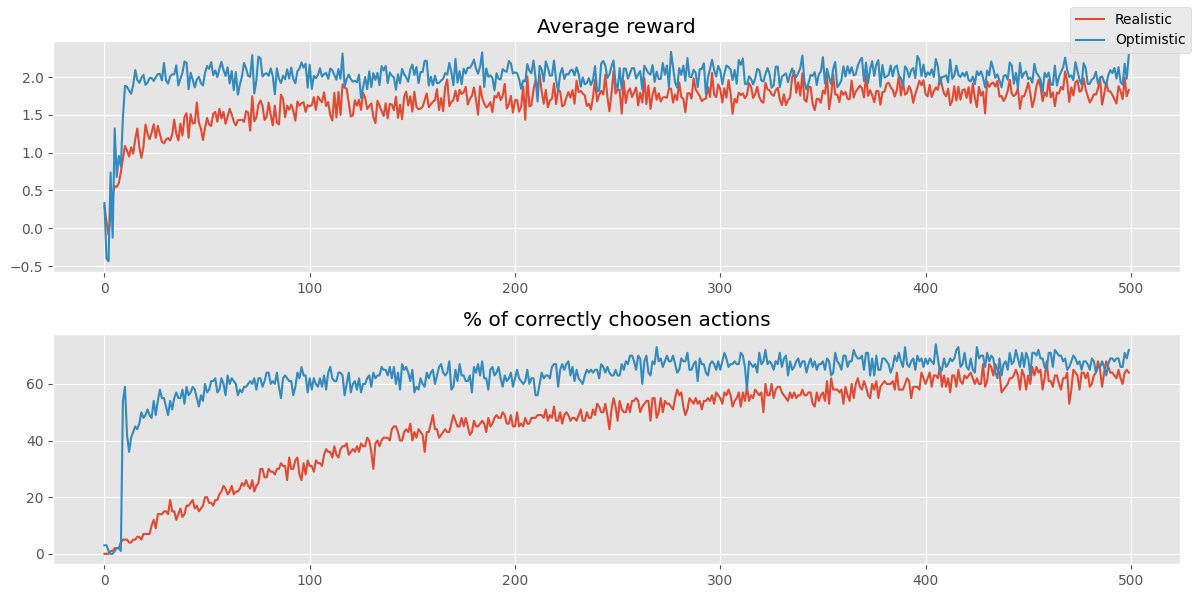

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)


ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

# UBC trick test

In [70]:
N = 100  # 100
T = 5000  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "constant", "stationary": False}
all_model_params = {"epsilon": 0.1}
model_parameters = {
    "SA": {"sample_averaging": True},
    "IC_mean": {"sample_averaging": False, "stepsize": 0.0},
    "IC_fixed": {"sample_averaging": False, "stepsize": 0.1},
    "IC_fixed_trick": {"UBC_trick": True, "stepsize": 0.1},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

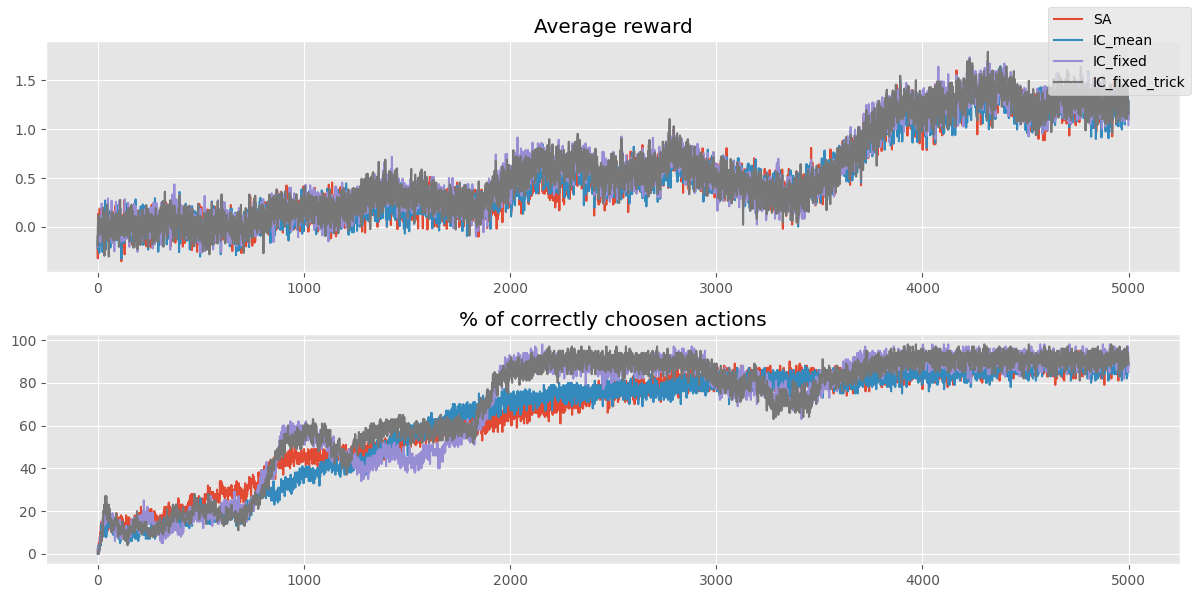

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

In [66]:
N = 100  # 100
T = 400  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "normal", "stationary": True}
all_model_params = {"epsilon": 0.1}
model_parameters = {
    "Realistic": {"sample_averaging": True},
    "UCB_1": {"sample_averaging": True, "UCB_c": 1},
    "UCB_2": {"sample_averaging": True, "UCB_c": 2},
    # "Optimistic": {"sample_averaging": True, "Q_init": 5},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

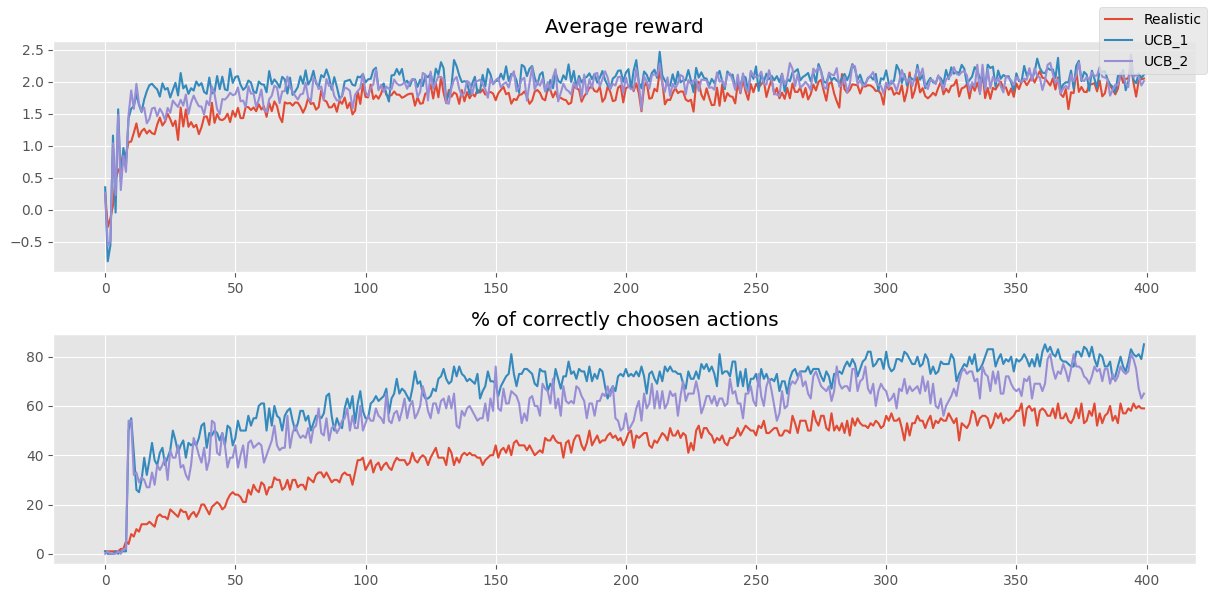

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions")
fig.legend(rewards_scores)
fig.tight_layout()

# Gradient bandit

In [68]:
N = 100  # 100
T = 1_000  # 10_000
K = 10

experiment_parameters = {"initial_distribution": "normal", "stationary": True, "initial_mean": 4}
all_model_params = {"epsilon": 0.001}
model_parameters = {
    "gradient_0": {"stepsize": 0.1, "gradient": True},
    "gradient_1": {"stepsize": 0.1, "gradient": True, "gradient_baseline": True},
    "gradient_2": {"stepsize": 0.3, "gradient": True},
    "gradient_3": {"stepsize": 0.3, "gradient": True, "gradient_baseline": True},
}

rewards_scores, correct_counts = run_experiment(K, N, T, experiment_parameters, all_model_params, model_parameters)

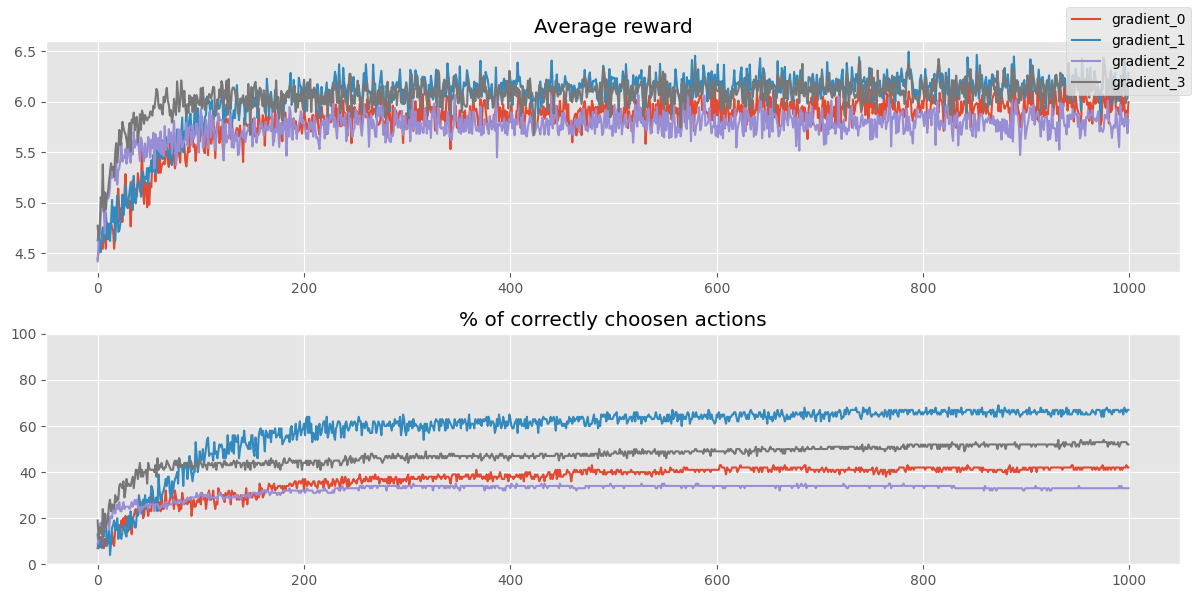

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

for name, scores in rewards_scores.items():
    ax1.plot(scores.mean(axis=0))

for name, scores in correct_counts.items():
    ax2.plot(scores.mean(axis=0) * 100)

ax1.set_title("Average reward")
ax2.set_title(r"% of correctly choosen actions"), ax2.set_ylim(0, 100)
fig.legend(rewards_scores)
fig.tight_layout()

In [98]:
from collections import defaultdict

K = 10
N = 100
T = 1000

experiment_parameters = {"initial_distribution": "normal", "stationary": True}
model_parameters = {
    "greedy": np.linspace(1 / 128, 1 / 4, 6),
    "gradient": np.linspace(1 / 32, 3, 6),
    "ucb": np.linspace(1 / 16, 4, 6),
    "optimisitc": np.linspace(1 / 4, 4, 6),
}
name_param = {
    "greedy": "epsilon",
    "gradient": "stepsize",
    "ucb": "UCB_c",
    "optimisitc": "Q_init",
}

results = []

bandit = K_bandit(K, **experiment_parameters)
REWARDS = bandit.simulate_game((N, T))


for model_name in model_parameters:
    param_name = name_param[model_name]
    for value in model_parameters[model_name]:
        model = GreedyAlgorithm(K, **{param_name: value})

        for n in range(N):
            model.init_model_params()
            for t in range(T):
                rewards = REWARDS[:, n, t]
                # agent turn
                action = model.act()
                model.step(action, rewards)

                results.append((model_name, value, rewards[action]))

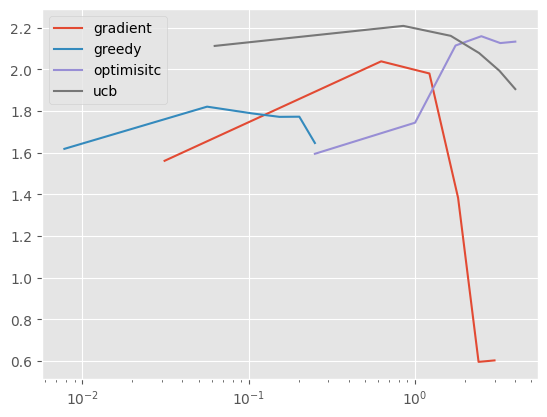

In [99]:
import pandas as pd

x = pd.DataFrame(results, columns=["algorithm", "param", "reward"])
x = x.groupby(["algorithm", "param"]).mean("reward").reset_index()
for alg in x.algorithm.unique():
    _x = x[x.algorithm == alg]
    plt.plot(_x["param"], _x["reward"])

plt.xscale("log")
plt.legend(x.algorithm.unique())

In [ ]:
# Design and conduct an experiment to demonstrate the di culties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q⇤(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the q⇤(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, ↵ =0.1. Use " =0.1 and longer runs, say of 10,000 steps